<a href="https://colab.research.google.com/github/kishore-yalamaddi/DL-Practice/blob/main/DL_EXP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from keras.datasets import reuters

In [ ]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words = 10000)

In [ ]:
print(f'training set : {train_data.shape}')
print(f'test set: {test_data.shape}')
print('training set example')
print(train_data[0])

training set : (8982,)
test set: (2246,)
training set example
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 74ms/step - loss: 2.8208 - accuracy: 0.4937 - val_loss: 1.9091 - val_accuracy: 0.6150
Epoch 2/20
16/16 [==============================] - 1s 52ms/step - loss: 1.5692 - accuracy: 0.6769 - val_loss: 1.3939 - val_accuracy: 0.6810
Epoch 3/20
16/16 [==============================] - 1s 54ms/step - loss: 1.1879 - accuracy: 0.7434 - val_loss: 1.1941 - val_accuracy: 0.7430
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.9721 - accuracy: 0.7890 - val_loss: 1.0886 - val_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8120 - accuracy: 0.8252 - val_loss: 1.0003 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 1s 53ms/step - loss: 0.6815 - accuracy: 0.8545 - val_loss: 0.9426 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 76ms/step - loss: 0.5683 - accuracy: 0.8789 - val_loss: 0.9039 - val_accuracy: 0.8160
Epoch 8/20
16

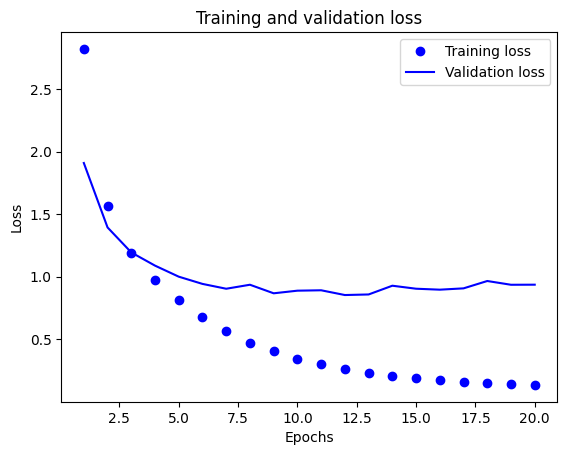

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

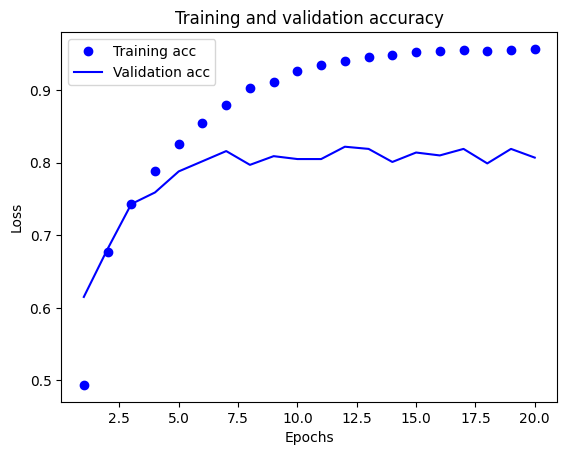

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
print("Submitted by 22KT5A4206")

Submitted by 22KT5A4206
